<a href="https://colab.research.google.com/github/paulaferreirao/Python-para-Data-Science/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Churn de Clientes – Telecom X

# 1. Bibliotecas e Configurações

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use("ggplot")
sns.set_theme()

# Exibição completa de colunas
pd.set_option("display.max_columns", None)

#2. Coleta de Dados via CSV

In [ ]:
# arquivo do JSON
arquivo = r"https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Lendo os dados diretamente do JSON
df = pd.read_json(arquivo)

# Tratamento de Dados

### Estrutura do DataFrame

In [ ]:
# Visualizar as 5 primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Visualizar as 5 últimas linhas
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
# Verificar o tamanho do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# Ver o tipo de cada coluna
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


# Expandir colunas com dicionários

As colunas ***customer, phone, internet, account*** são objetos com vários atributos dentro. Precisamos transformá-las em colunas separadas.

In [ ]:
# Função para expandir uma coluna que contém dicionários
def expand_dict_column(df, column_name):
    return df[column_name].apply(pd.Series)

# Aplicar a função em cada coluna
customer_info = expand_dict_column(df, "customer")
phone_info = expand_dict_column(df, "phone")
internet_info = expand_dict_column(df, "internet")
account_info = expand_dict_column(df, "account")

In [ ]:
# Mantemos customerID e Churn, e juntamos com as novas colunas
df_flat = pd.concat(
    [
        df[["customerID", "Churn"]],
        customer_info,
        phone_info,
        internet_info,
        account_info,
    ],
    axis=1,
)

# Verificar o resultado
df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


#Tratar a coluna Charges

Essa coluna ainda tem outro dicionário com Monthly e Total:

In [ ]:
# Expandir sem usar ast.literal_eval, pois já é dicionário
charges_info = df_flat["Charges"].apply(pd.Series)

# Renomear as colunas para facilitar a leitura
charges_info.columns = ["MonthlyCharges", "TotalCharges"]

# Remover a coluna antiga e adicionar as novas
df_flat = df_flat.drop(columns=["Charges"])
df_flat = pd.concat([df_flat, charges_info], axis=1)
df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Conferir tipos e valores ausentes

Verificando se há colunas com tipo errado (ex: número como texto) ou valores nulos:

In [ ]:
# Conferir tipos de dados
df_flat.dtypes

# Verificar valores ausentes
df_flat.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#Corrigir os tipos de dados

Converta as colunas para int:

In [ ]:
# Convertendo colunas
df_flat["SeniorCitizen"] = df_flat["SeniorCitizen"].astype(int)
df_flat["tenure"] = df_flat["tenure"].astype(int)

# Algumas conversões podem gerar erros se houver valores nulos ou texto
df_flat["MonthlyCharges"] = pd.to_numeric(df_flat["MonthlyCharges"], errors="coerce")
df_flat["TotalCharges"] = pd.to_numeric(df_flat["TotalCharges"], errors="coerce")

#Reavaliar os dados após o tratamento

Após conversão

In [ ]:
# Verificar novamente os tipos
df_flat.dtypes

# Verificar valores ausentes após conversões
df_flat.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Ver algumas linhas onde Churn está ausente
df_flat[df_flat["Churn"].isnull()].head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [ ]:
# Remover linhas com Churn ausente
df_flat = df_flat[~df_flat["Churn"].isnull()]

In [ ]:
# Ver quantas linhas têm TotalCharges ausente
df_flat["TotalCharges"].isnull().sum()

np.int64(11)

In [ ]:
# Ver algumas dessas linhas
df_flat[df_flat["TotalCharges"].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [ ]:
# Remover linhas com TotalCharges ausente
df_flat = df_flat[~df_flat["TotalCharges"].isnull()]

In [ ]:
# Checar se ainda há valores ausentes
df_flat.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Verificar duplicados
print("Duplicados:", df_flat.duplicated().sum())

# Criar uma nova coluna: cliente recém-chegado (tenure <= 6 meses)
df_flat['NovoCliente'] = df_flat['tenure'] <= 6


Duplicados: 0


/tmp/ipython-input-64-3355215896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flat['NovoCliente'] = df_flat['tenure'] <= 6


In [ ]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [ ]:
# Lista de colunas a serem convertidas para o tipo 'category'
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'NovoCliente'
]

for col in colunas_categoricas:
    if col in df_flat.columns: # Garante que a coluna existe no DataFrame
        df_flat[col] = df_flat[col].astype('category')

# Verifique os tipos de dados para confirmar a conversão
print("\n---")
print("### Informações do DataFrame após Conversão:")
print(df_flat.info())



---
### Informações do DataFrame após Conversão:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   category
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null   category
 5   Dependents        7256 non-null   category
 6   tenure            7256 non-null   int64   
 7   PhoneService      7256 non-null   category
 8   MultipleLines     7256 non-null   category
 9   InternetService   7256 non-null   category
 10  OnlineSecurity    7256 non-null   category
 11  OnlineBackup      7256 non-null   category
 12  DeviceProtection  7256 non-null   category
 13  TechSupport       7256 non-null   category
 14  StreamingTV       7256 non-null   category
 15  StreamingMovies   7256 non-

/tmp/ipython-input-66-1014173379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flat[col] = df_flat[col].astype('category')
/tmp/ipython-input-66-1014173379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flat[col] = df_flat[col].astype('category')
/tmp/ipython-input-66-1014173379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

#Feature Engineering (novas colunas úteis)

In [ ]:
# Criar coluna: cliente novo (tenure <= 6 meses)
df_flat['NovoCliente'] = df_flat['tenure'] <= 6

# Criar coluna: idoso
df_flat['Idoso'] = df_flat['SeniorCitizen'] == 1

# Verificar duplicatas
#print("Duplicados:", df_flat.duplicated().sum())
# Transformar em category
df_flat['NovoCliente'] = df_flat['NovoCliente'].astype('category')
df_flat['Idoso'] = df_flat['Idoso'].astype('category')



In [ ]:
df_flat.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'NovoCliente', 'Idoso'],
      dtype='object')

In [ ]:
# Criação da feature: GrupoTenure
bins = [0, 12, 24, 48, 60, df_flat['tenure'].max()]
labels = ['0-12 Meses', '13-24 Meses', '25-48 Meses', '49-60 Meses', 'Mais de 60 Meses']
df_flat['GrupoTenure'] = pd.cut(df_flat['tenure'], bins=bins, labels=labels, right=True)

print("\n---")
print("Distribuição de clientes por grupo de tempo:")
print(df_flat['GrupoTenure'].value_counts().sort_index())
print(df_flat[['tenure', 'GrupoTenure']].head())



---
Distribuição de clientes por grupo de tempo:
GrupoTenure
0-12 Meses          2254
13-24 Meses         1045
25-48 Meses         1648
49-60 Meses          858
Mais de 60 Meses    1451
Name: count, dtype: int64
   tenure  GrupoTenure
0       9   0-12 Meses
1       9   0-12 Meses
2       4   0-12 Meses
3      13  13-24 Meses
4       3   0-12 Meses


In [ ]:
# Criação da feature: CobrancaDiaria
df_flat['CobrancaDiaria'] = df_flat['MonthlyCharges'] / 30
print("\n---")
print("Visualização das colunas de cobrança mensal e diária:")
print(df_flat[['MonthlyCharges', 'CobrancaDiaria']].head())


---
Visualização das colunas de cobrança mensal e diária:
   MonthlyCharges  CobrancaDiaria
0            65.6        2.186667
1            59.9        1.996667
2            73.9        2.463333
3            98.0        3.266667
4            83.9        2.796667


In [ ]:
# Estatísticas e informações atualizadas
print("\n---")
print("Estatísticas de CobrancaDiaria:")
print(df_flat['CobrancaDiaria'].describe())
print("\nInformações atualizadas do DataFrame:")
print(df_flat.info())


---
Estatísticas de CobrancaDiaria:
count    7256.000000
mean        2.158514
std         1.004191
min         0.608333
25%         1.181667
50%         2.343333
75%         2.996667
max         3.958333
Name: CobrancaDiaria, dtype: float64

Informações atualizadas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   category
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null   category
 5   Dependents        7256 non-null   category
 6   tenure            7256 non-null   int64   
 7   PhoneService      7256 non-null   category
 8   MultipleLines     7256 non-null   category
 9   InternetService   7256 non-null   category
 10  OnlineSecurity    7256 non-null   ca

#Avaliação de Dados Inconsistentes

In [ ]:
print("🔍 Avaliação Geral de Colunas: Valores únicos, tipos e inconsistências\n")

# Visualizar resumo geral de colunas
resumo_colunas = pd.DataFrame({
    'Tipo': df_flat.dtypes,
    'Valores Únicos': df_flat.nunique(),
    'Nulos (%)': (df_flat.isnull().sum() / len(df_flat) * 100).round(2),
    'Exemplos': df_flat.apply(lambda x: x.unique()[:5])
})

# Ordenar por % de nulos (se desejar)
resumo_colunas = resumo_colunas.sort_values(by='Nulos (%)', ascending=False)

display(resumo_colunas)


🔍 Avaliação Geral de Colunas: Valores únicos, tipos e inconsistências



,Tipo,Valores Únicos,Nulos (%),Exemplos
customerID,object,7256,0.0,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
Churn,category,3,0.0,"['No', 'Yes', ''] Categories (3, object): ['',..."
gender,category,2,0.0,"['Female', 'Male'] Categories (2, object): ['F..."
SeniorCitizen,int64,2,0.0,"[0, 1]"
Partner,category,2,0.0,"['Yes', 'No'] Categories (2, object): ['No', '..."
Dependents,category,2,0.0,"['Yes', 'No'] Categories (2, object): ['No', '..."
tenure,int64,72,0.0,"[9, 4, 13, 3, 71]"
PhoneService,category,2,0.0,"['Yes', 'No'] Categories (2, object): ['No', '..."
MultipleLines,category,3,0.0,"['No', 'Yes', 'No phone service'] Categories (..."
InternetService,category,3,0.0,"['DSL', 'Fiber optic', 'No'] Categories (3, ob..."


In [ ]:
print("Valores nulos em 'Churn':", df_flat['Churn'].isnull().sum())


Valores nulos em 'Churn': 0


In [ ]:
# Remove as linhas onde 'Churn' é nulo
df_tratado = df_flat[df_flat['Churn'].notnull()]


In [ ]:
# Mostrar os valores únicos restantes
print("Valores únicos em 'Churn':", df_tratado['Churn'].unique())

# Confirmar que não há mais nulos
print("Valores nulos em 'Churn' após remoção:", df_tratado['Churn'].isnull().sum())


Valores únicos em 'Churn': ['No', 'Yes', '']
Categories (3, object): ['', 'No', 'Yes']
Valores nulos em 'Churn' após remoção: 0


In [ ]:
df_tratado.to_csv("dados_tratados_telecomX.csv", index=False)


In [ ]:
df_not_nan_chrun = pd.read_csv("dados_tratados_telecomX.csv")

#Checar colunas com valor constante

In [ ]:
# Colunas com apenas um valor único (não trazem informação útil)
col_constantes = [col for col in df_not_nan_chrun.columns if df_not_nan_chrun[col].nunique() == 1]
print("Colunas com valor constante:", col_constantes)



Colunas com valor constante: []


# Análise Exploratória de Dados (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Para ter gráficos mais bonitos e embutidos no notebook
plt.style.use('ggplot')


In [ ]:
# Verificar a distribuição absoluta de 'Churn'
print("### Distribuição da Variável Churn:")
print(df_not_nan_chrun['Churn'].value_counts())

### Distribuição da Variável Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


🧾 Etapa 1: Revisar estrutura e tipos das variáveis

In [ ]:
# Ver tipos das colunas
df_not_nan_chrun.dtypes

# Ver resumo estatístico das colunas numéricas
df_not_nan_chrun.describe()

# Ver resumo das colunas categóricas
df_not_nan_chrun.describe(include="object")

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,GrupoTenure
count,7256,7032,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0-12 Meses
freq,1,5163,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445,2254


📊 Etapa 2: Distribuição do alvo (Churn)

Vamos ver o balanceamento da variável Churn (quem cancelou e quem ficou):

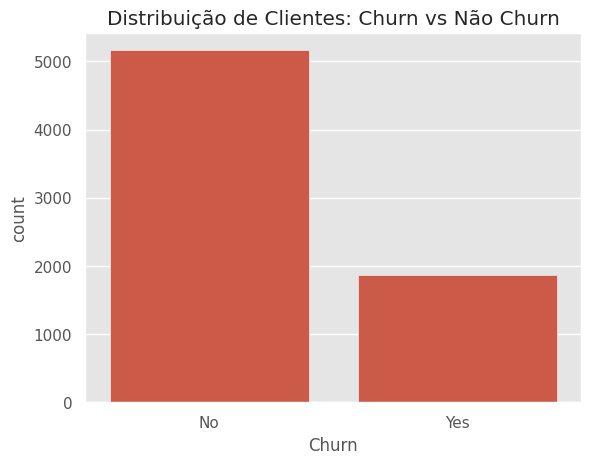

,proportion
Churn,
No,0.734215
Yes,0.265785


In [ ]:
# Contagem de churn
sns.countplot(x="Churn", data=df_not_nan_chrun)
plt.title("Distribuição de Clientes: Churn vs Não Churn")
plt.show()

# Proporção
df_not_nan_chrun["Churn"].value_counts(normalize=True)

📈 Etapa 3: Variáveis Numéricas vs Churn

Vamos verificar se valores como **tenure, MonthlyCharges, TotalCharges** têm padrões diferentes entre clientes que saíram e os que ficaram.

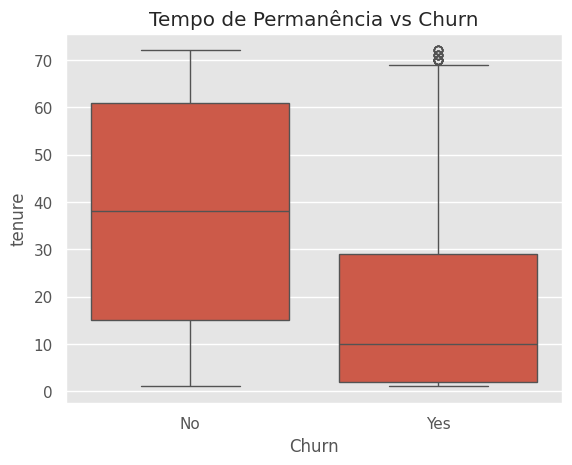

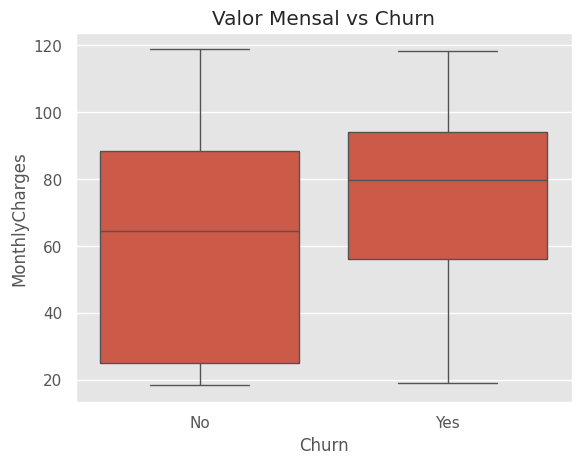

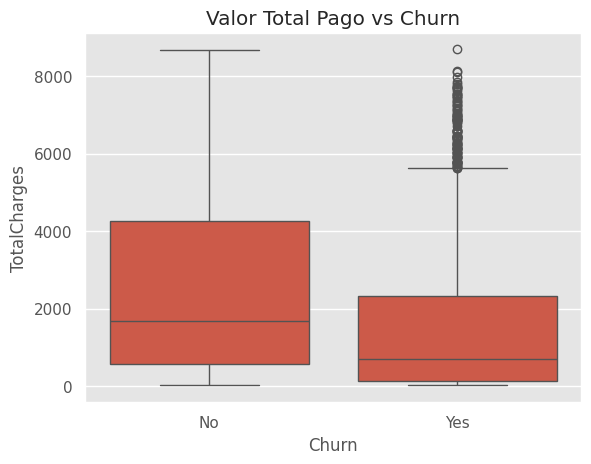

In [ ]:
# Tempo de permanência
sns.boxplot(x="Churn", y="tenure", data=df_not_nan_chrun)
plt.title("Tempo de Permanência vs Churn")
plt.show()

# Valor mensal
sns.boxplot(x="Churn", y="MonthlyCharges", data=df_not_nan_chrun)
plt.title("Valor Mensal vs Churn")
plt.show()

# Valor total
sns.boxplot(x="Churn", y="TotalCharges", data=df_not_nan_chrun)
plt.title("Valor Total Pago vs Churn")
plt.show()

📊 Etapa 4: Variáveis Categóricas vs Churn

Agora vamos investigar colunas como **Contract, InternetService, PaymentMethod**, etc.

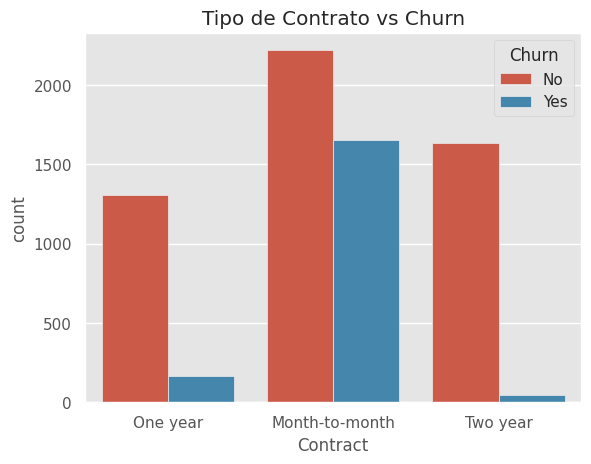

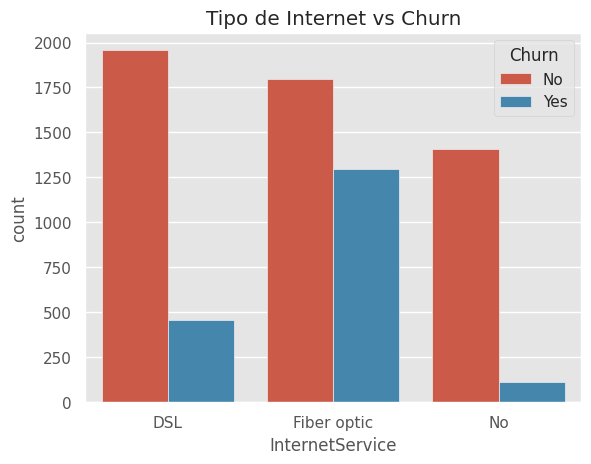

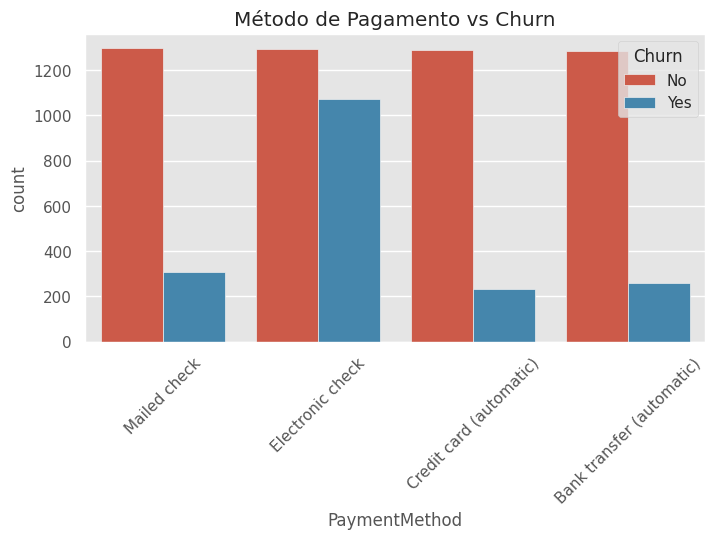

In [ ]:
# Contrato x Churn
sns.countplot(x="Contract", hue="Churn", data=df_not_nan_chrun)
plt.title("Tipo de Contrato vs Churn")
plt.xticks(rotation=0)
plt.show()

# InternetService x Churn
sns.countplot(x="InternetService", hue="Churn", data=df_not_nan_chrun)
plt.title("Tipo de Internet vs Churn")
plt.show()

# PaymentMethod x Churn
plt.figure(figsize=(8, 4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df_not_nan_chrun)
plt.title("Método de Pagamento vs Churn")
plt.xticks(rotation=45)
plt.show()

🧠 Etapa 5: Correlação entre variáveis numéricas

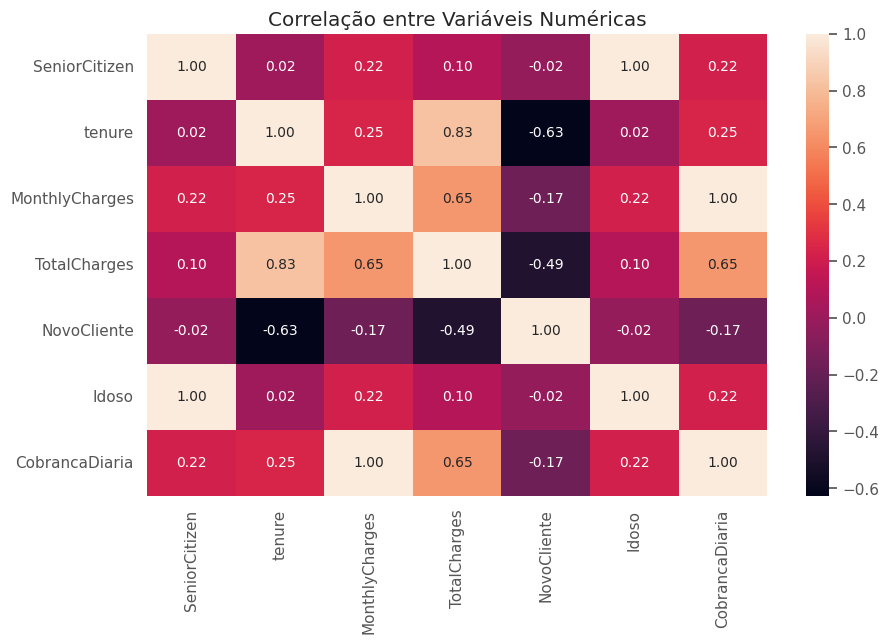

In [ ]:
# Correlação apenas entre colunas numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_not_nan_chrun.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()


---
### Análise Univariada de TODAS as Variáveis Categóricas (Incluindo Churn):

---
### Análise Univariada de Variáveis Numéricas:

--- Coluna: tenure ---

Estatísticas Descritivas:
count    7256.000000
mean       32.395535
std        24.558067
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


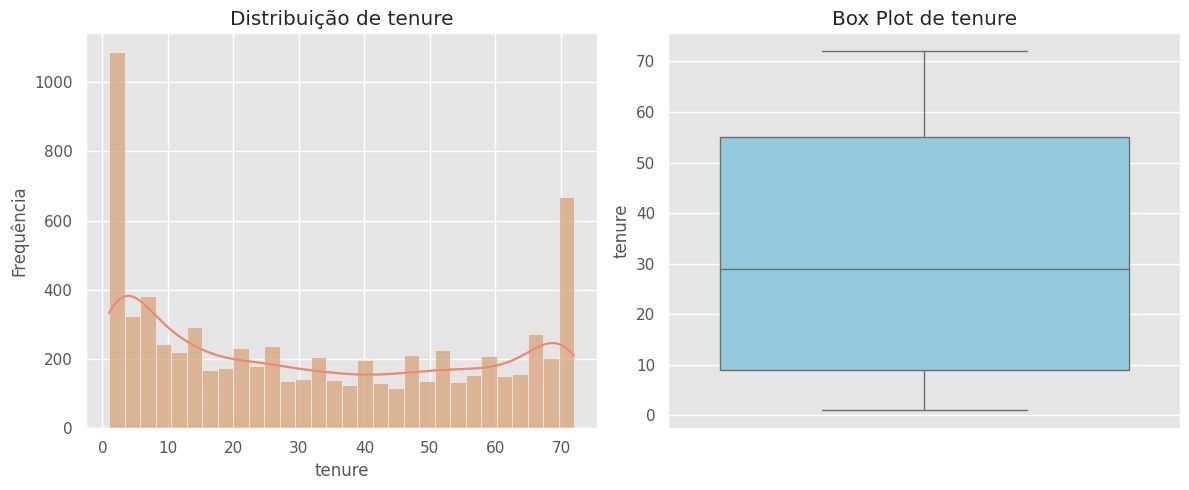


--- Coluna: MonthlyCharges ---

Estatísticas Descritivas:
count    7256.000000
mean       64.755423
std        30.125739
min        18.250000
25%        35.450000
50%        70.300000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64


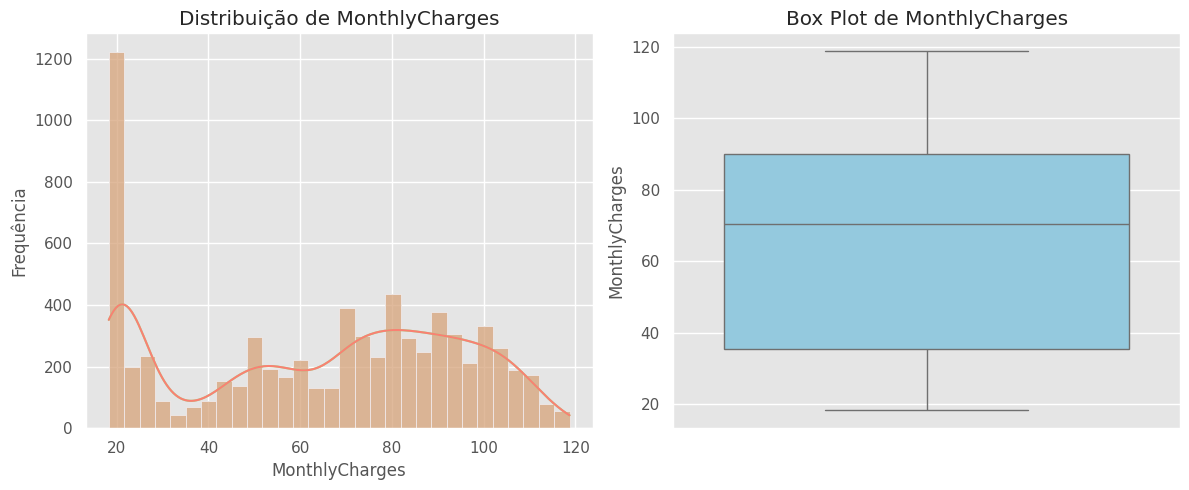


--- Coluna: TotalCharges ---

Estatísticas Descritivas:
count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: TotalCharges, dtype: float64


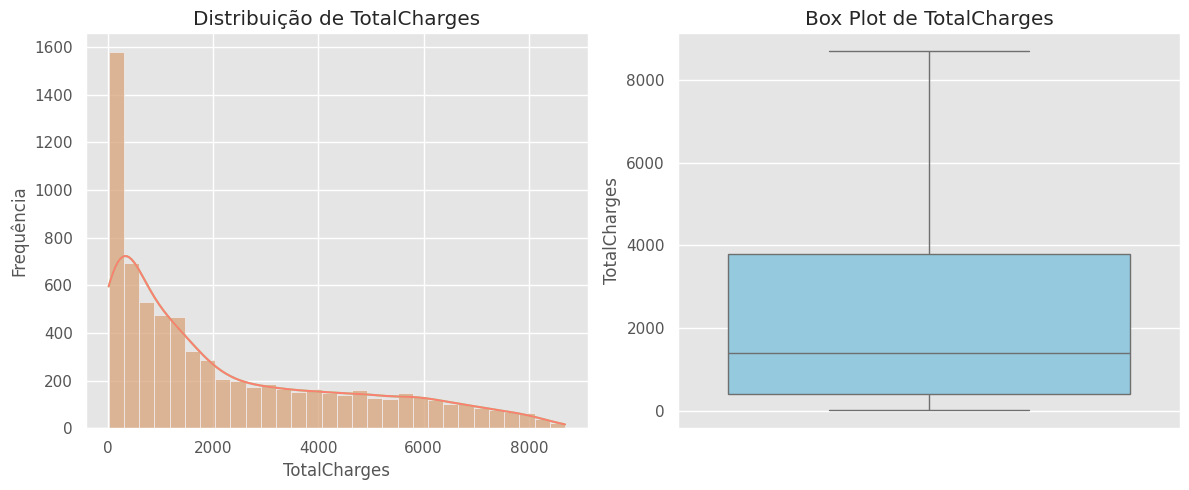

In [ ]:
plt.style.use('ggplot')
# Análise Univariada de Variáveis Categóricas
# Listar TODAS as colunas categóricas (agora incluindo 'Churn')
todas_colunas_categoricas = [col for col in df_not_nan_chrun.columns if df_not_nan_chrun[col].dtype == 'category']

print("\n---")
print("### Análise Univariada de TODAS as Variáveis Categóricas (Incluindo Churn):")

for col in todas_colunas_categoricas:
    print(f"\n--- Coluna: {col} ---")
    print(df_not_nan_chrun[col].value_counts())
    print(df_not_nan_chrun[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_not_nan_chrun, x=col, hue=col, palette='Set2', legend=False, order=df_not_nan_chrun[col].value_counts().index)
    plt.title(f'Distribuição da Variável: {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# E agora, a análise univariada das numéricas
colunas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n---")
print("### Análise Univariada de Variáveis Numéricas:")

for col in colunas_numericas:
    print(f"\n--- Coluna: {col} ---")
    # Estatísticas Descritivas
    print("\nEstatísticas Descritivas:")
    print(df_not_nan_chrun[col].describe())

    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.histplot(df_not_nan_chrun[col], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    sns.histplot(df_not_nan_chrun[col], kde=True, bins=30, color='salmon')
    # Box Plot
    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.boxplot(y=df_not_nan_chrun[col], color='skyblue')
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# Análise Multivariada

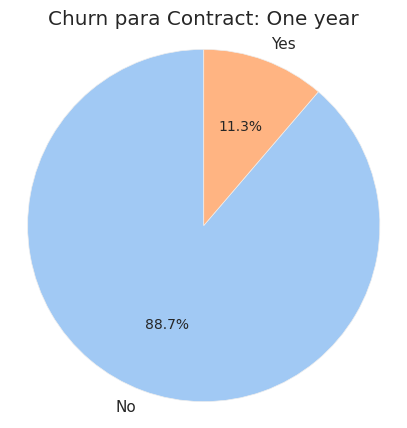

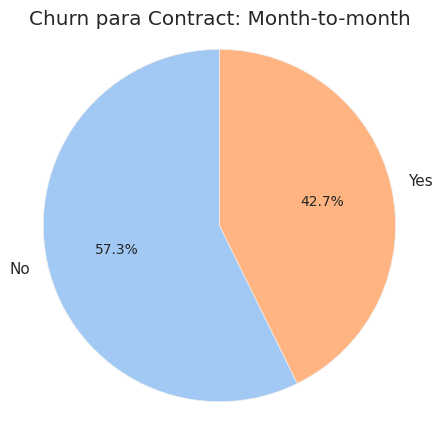

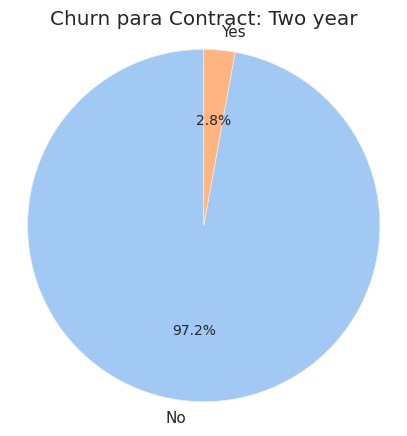

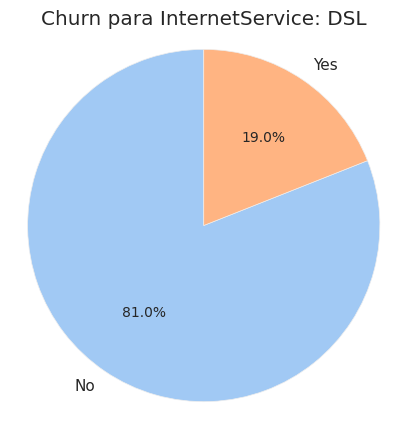

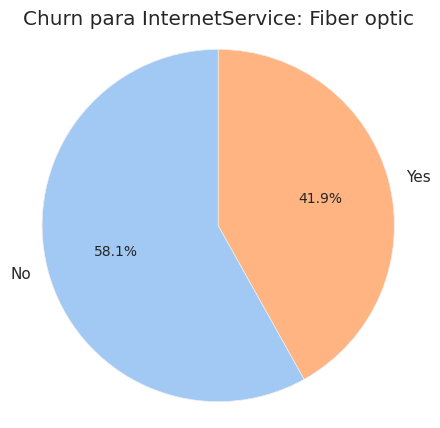

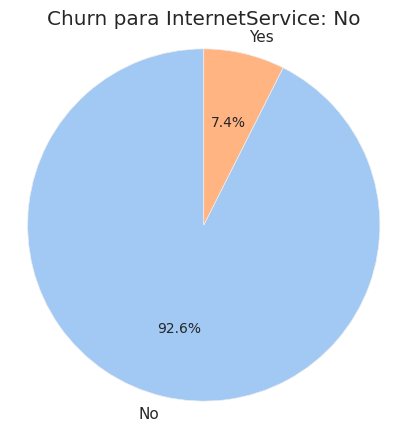

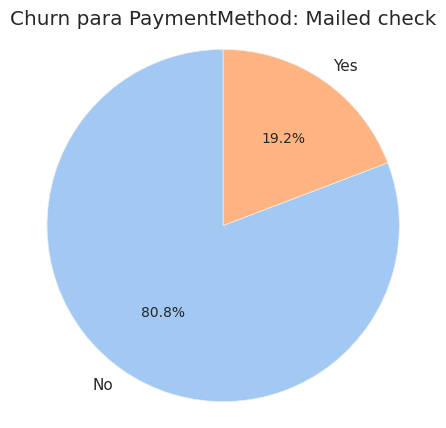

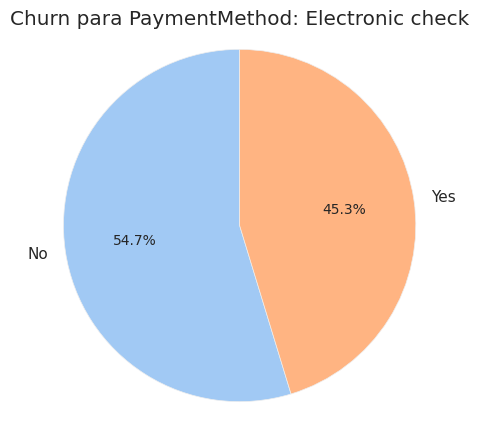

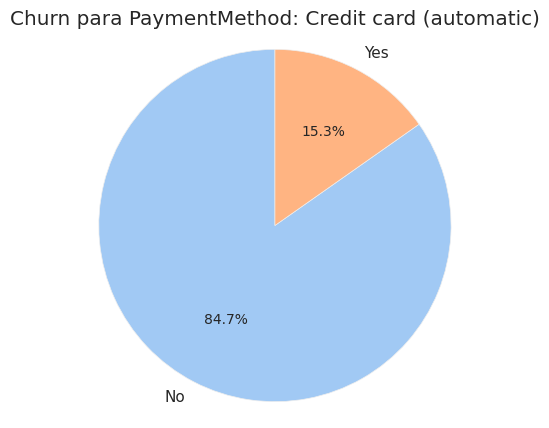

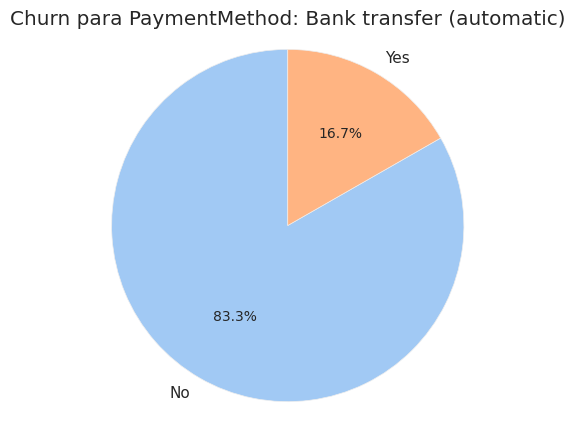

In [ ]:
variaveis = ['Contract', 'InternetService', 'PaymentMethod']

for var in variaveis:
    categorias = df_not_nan_chrun[var].unique()
    for cat in categorias:
        dados = df_not_nan_chrun[df_not_nan_chrun[var] == cat]['Churn'].value_counts()
        labels = dados.index
        sizes = dados.values

        plt.figure(figsize=(5, 5))
        plt.pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('pastel')[0:len(labels)]
        )
        plt.title(f'Churn para {var}: {cat}')
        plt.axis('equal')
        plt.show()



---
### Análise Bivariada: Relação entre Variáveis Numéricas e Churn:


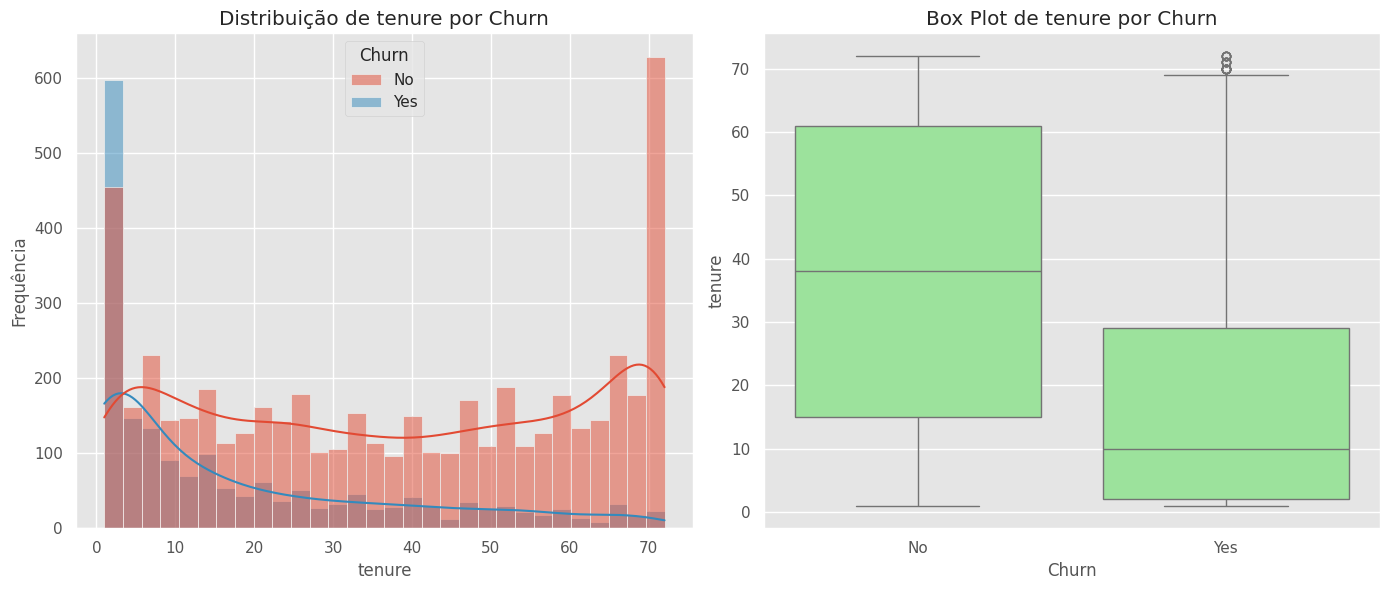


Estatísticas Descritivas de tenure por Churn:
| Churn   |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|:--------|--------:|--------:|--------:|------:|------:|------:|------:|------:|
| No      |    5163 | 37.65   | 24.0769 |     1 |    15 |    38 |    61 |    72 |
| Yes     |    1869 | 17.9791 | 19.5311 |     1 |     2 |    10 |    29 |    72 |
--------------------------------------------------


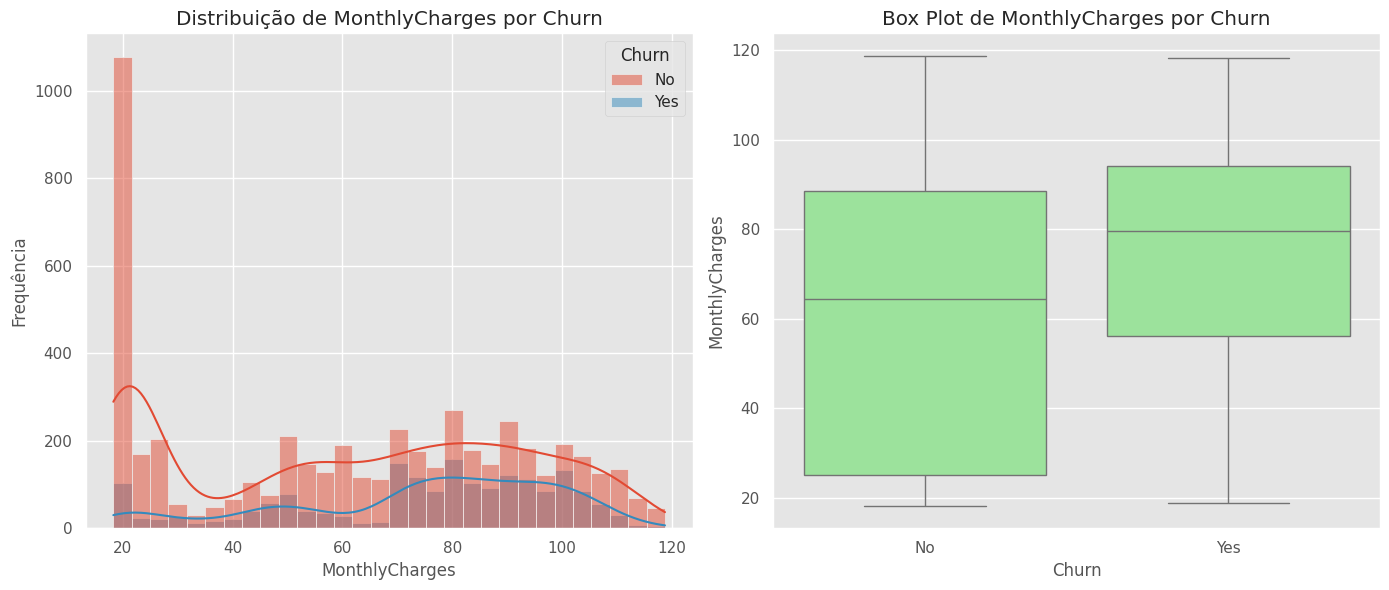


Estatísticas Descritivas de MonthlyCharges por Churn:
| Churn   |   count |    mean |     std |   min |   25% |   50% |    75% |    max |
|:--------|--------:|--------:|--------:|------:|------:|------:|-------:|-------:|
| No      |    5163 | 61.3074 | 31.0946 | 18.25 | 25.1  | 64.45 | 88.475 | 118.75 |
| Yes     |    1869 | 74.4413 | 24.6661 | 18.85 | 56.15 | 79.65 | 94.2   | 118.35 |
--------------------------------------------------


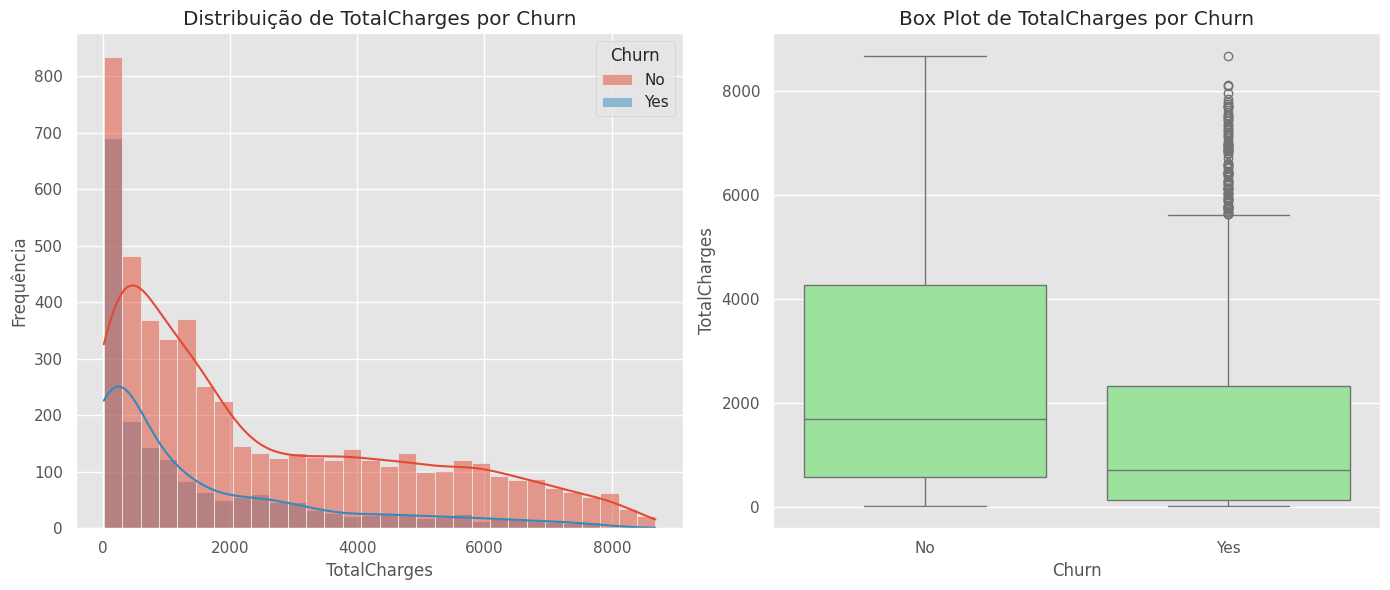


Estatísticas Descritivas de TotalCharges por Churn:
| Churn   |   count |    mean |     std |   min |     25% |     50% |     75% |     max |
|:--------|--------:|--------:|--------:|------:|--------:|--------:|--------:|--------:|
| No      |    5163 | 2555.34 | 2329.46 | 18.8  | 577.825 | 1683.6  | 4264.12 | 8672.45 |
| Yes     |    1869 | 1531.8  | 1890.82 | 18.85 | 134.5   |  703.55 | 2331.3  | 8684.8  |
--------------------------------------------------


In [ ]:
plt.style.use('ggplot')
# %matplotlib inline # Descomente se estiver em um ambiente Jupyter/IPython

colunas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n---")
print("### Análise Bivariada: Relação entre Variáveis Numéricas e Churn:")

for col in colunas_numericas:
    plt.figure(figsize=(14, 6))

    # Histograma para Churn 'No' vs 'Yes'
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_not_nan_chrun, x=col, hue='Churn', kde=True, bins=30, color='salmon')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    #plt.legend(title='Churn')

    # Box Plot para Churn 'No' vs 'Yes'
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_not_nan_chrun, x='Churn', y=col, color='lightgreen')
    plt.title(f'Box Plot de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    # Opcional: Estatísticas descritivas para cada grupo de Churn
    print(f"\nEstatísticas Descritivas de {col} por Churn:")
    print(df_not_nan_chrun.groupby('Churn',observed=False)[col].describe().to_markdown())
    print("-" * 50)

In [ ]:
# Resumo das análises descritivas e numéricas

if df_not_nan_chrun.empty:
	print("O DataFrame df_not_nan_chrun está vazio. Não há dados para mostrar.")
else:
	print("### Resumo Estatístico das Variáveis Numéricas:")
	print(df_not_nan_chrun.describe())

	print("### Resumo das Variáveis Categóricas:")
	print(df_not_nan_chrun.describe(include='category'))

	print("\n### Resumo das Variáveis do DataFrame:")
	print(df_not_nan_chrun.info())

### Resumo Estatístico das Variáveis Numéricas:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges  \
count      7256.0000  7256.000000     7256.000000   7256.000000   
mean          0.1629    32.395535       64.755423   2280.634213   
std           0.3693    24.558067       30.125739   2268.632997   
min           0.0000     1.000000       18.250000     18.800000   
25%           0.0000     9.000000       35.450000    400.225000   
50%           0.0000    29.000000       70.300000   1391.000000   
75%           0.0000    55.000000       89.900000   3785.300000   
max           1.0000    72.000000      118.750000   8684.800000   

       CobrancaDiaria  
count     7256.000000  
mean         2.158514  
std          1.004191  
min          0.608333  
25%          1.181667  
50%          2.343333  
75%          2.996667  
max          3.958333  
### Resumo das Variáveis Categóricas:


ValueError: No objects to concatenate

# 📊 Sumário Executivo: Análise de Churn – Telecom X

## 📌 Descobertas Chave da Análise de Churn

### 1. Alta taxa de churn entre clientes novos
- Clientes com menos de 12 meses de contrato (`GrupoTenure = 0-12 Meses`) apresentam a maior concentração de cancelamentos.
- O gráfico confirma que **quanto menor o tempo de permanência, maior a evasão**.

### 2. Idosos e novos clientes têm comportamento de risco
- A feature `Idoso` (clientes com `SeniorCitizen == 1`) mostra grupo com maior propensão a churn.
- A variável `NovoCliente` revelou que **mais da metade dos clientes até 6 meses saem** — comportamento típico de abandono precoce.

### 3. Valor mensal elevado está associado a churn
- Clientes com `MonthlyCharges` mais altos aparecem em maior proporção no grupo que cancela.
- A nova feature `CobrancaDiaria` ajuda a observar **o impacto do custo percebido por dia**, especialmente entre clientes de contratos curtos.

---

## ✅ Recomendações Estratégicas

### 🔹 1. Criar programas de onboarding e retenção para novos clientes
- Implementar **contato ativo nos primeiros 3-6 meses**.
- Enviar mensagens de boas-vindas, oferecer suporte técnico, e medir satisfação regularmente.

### 🔹 2. Oferecer descontos progressivos para contratos mais longos
- Estimular migração de contratos mensais para **planos de 1 ano ou 2 anos**, com:
  - Descontos;
  - Benefícios acumulativos;
  - Prioridade no atendimento.

### 🔹 3. Reduzir churn entre clientes de alto valor mensal
- Criar planos escalonáveis com **custos mais suaves nos primeiros meses**.
- Reavaliar o custo-benefício percebido por esses clientes.

### 🔹 4. Apoiar clientes idosos
- Criar **linha de atendimento prioritária** para clientes com mais idade.
- Promover planos mais simples e com suporte mais presente.

---

## 🔄 Próximos Passos na Análise de Dados

### 🔍 1. Modelagem preditiva
- Construir modelos de machine learning (Logistic Regression, Random Forest, XGBoost) usando features como:
  - `GrupoTenure`, `CobrancaDiaria`, `Idoso`, `InternetService`, `Contract`, `PaymentMethod`.

### 📊 2. Análise de rentabilidade por perfil
- Cruzar dados de churn com **TotalCharges** e **Customer Lifetime Value (LTV)** para entender **quais perfis mais valem ser retidos**.

### 🧠 3. Segmentação inteligente
- Aplicar técnicas de clusterização (K-Means, DBSCAN) para encontrar perfis de clientes com alto risco de evasão.

### 📈 4. Dashboard de monitoramento contínuo
- Criar visualizações (com Streamlit, Dash ou Power BI) que atualizam automaticamente os indicadores de churn e alertam para grupos críticos.
